# Capstone Project - Predicting Car Accident Severity
### Applied DataScience Capstone

This notebook contains all the steps and transformations I performed for the feature selection for the Predictin of Traffic Accident Severity project. You can find the information on the raw data in the following kaggle page. The [kaggle](https://www.kaggle.com/ahmedlahlou/accidents-in-france-from-2005-to-2016) datasets contain an extended descriptions of different aspect of the accidents, thus I've selected the most relevant and useful data for my analysis.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
#importing data
chs=pd.read_csv('car-accident-france/characteristics.csv',encoding='latin-1', low_memory=False)
places=pd.read_csv('car-accident-france/places.csv')
users=pd.read_csv('car-accident-france/users.csv')
vehicles = pd.read_csv('car-accident-france/vehicles.csv')
holidays = pd.read_csv('car-accident-france/holidays.csv')

### Steps

- 1. Removing the insignificant features for my analysis.
- 2. Merging the columns
- 3. Summary of users data
- 4. Adding few features like date and time

In [19]:
print(chs.info(),places.info(),users.info(),vehicles.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839985 entries, 0 to 839984
Data columns (total 16 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Num_Acc  839985 non-null  int64  
 1   an       839985 non-null  int64  
 2   mois     839985 non-null  int64  
 3   jour     839985 non-null  int64  
 4   hrmn     839985 non-null  int64  
 5   lum      839985 non-null  int64  
 6   agg      839985 non-null  int64  
 7   int      839985 non-null  int64  
 8   atm      839930 non-null  float64
 9   col      839974 non-null  float64
 10  com      839983 non-null  float64
 11  adr      699443 non-null  object 
 12  gps      366226 non-null  object 
 13  lat      362471 non-null  float64
 14  long     362467 non-null  object 
 15  dep      839985 non-null  int64  
dtypes: float64(4), int64(9), object(3)
memory usage: 102.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839985 entries, 0 to 839984
Data columns (total 18 columns):
 #   Column 

#### Droping unrelevant columns

In [20]:
chs.drop(['adr','com', 'gps'], axis=1, inplace=True)
places.drop(['v1', 'v2', 'pr', 'pr1', 'lartpc', 'larrout'], axis=1,  inplace=True)
vehicles.drop(['senc', 'occutc', 'obs', 'obsm', 'choc', 'manv', 'num_veh'], axis=1, inplace=True)
print(chs.shape, places.shape, vehicles.shape, users.shape)

(839985, 13) (839985, 12) (1433389, 2) (1876005, 12)


In [21]:
#no. of samples in chs and places are same so it's better to merge them
chs.columns = ['ID', 'year', 'month', 'day', 'time', 'lum', 'agg', 'int', 'atm', 'col', 'lat', 'long', 'dep']
places.columns = ['ID','road_cat', 'road_num', 'traf_reg', 'num_lanes', 'res_lane', 'long_prof', 'shape', 'surf', 'infra', 'situation', 'school']
df = chs.merge(places,how='inner',on='ID')
df.head()

,ID,year,month,day,time,lum,agg,int,atm,col,...,road_num,traf_reg,num_lanes,res_lane,long_prof,shape,surf,infra,situation,school
0,201600000001,16,2,1,1445,1,2,1,8.0,3.0,...,39,2.0,0.0,0.0,1.0,3.0,1.0,0.0,1.0,0.0
1,201600000002,16,3,16,1800,1,2,6,1.0,6.0,...,39,1.0,0.0,0.0,1.0,2.0,1.0,0.0,1.0,0.0
2,201600000003,16,7,13,1900,1,1,1,1.0,6.0,...,1,2.0,2.0,0.0,1.0,3.0,2.0,0.0,3.0,99.0
3,201600000004,16,8,15,1930,2,2,1,7.0,3.0,...,0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,99.0
4,201600000005,16,12,23,1100,1,2,3,1.0,3.0,...,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,3.0


In [27]:
vehicles['catv'].value_counts().sort_index().shape

(33,)

Since the values of the vehicles described is 13, doesn't match that to the described 
values which has 33 different classifications. 

### users
The **users** data set contains an extended description of the people involved in the accident. For the ease of analysis and computation, I am going to select the aspects I think are more relevant for the prediction of accident severity. These are:

+ num_users: Number of users involved in each accident.
+ ped: If there are pedestrians involved or not.
+ critic_age: If there are users of the critical range of ages involved in the accident. Being the critical ages, the ones with more deaths accounted from 2005 to 2016.
+ dead_age: If there are users with higher death toll, specifically where from every 10 users of this age at least one dies. 
+ sev: severity of the accident

In [29]:
users.head(5)

,Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais,num_veh
0,201600000001,1.0,1,1,2,0.0,11.0,0.0,0.0,0.0,1983.0,B02
1,201600000001,1.0,1,3,1,9.0,21.0,0.0,0.0,0.0,2001.0,A01
2,201600000002,1.0,1,3,1,5.0,11.0,0.0,0.0,0.0,1960.0,A01
3,201600000002,2.0,2,3,1,0.0,11.0,0.0,0.0,0.0,2000.0,A01
4,201600000002,3.0,2,3,2,0.0,11.0,0.0,0.0,0.0,1962.0,A01


In [33]:
users.drop(['place', 'sexe', 'trajet', 'locp', 'actp', 'etatp', 'num_veh'], axis=1, inplace=True)
users.columns = ['ID', 'catu', 'grav', 'secu', 'year_birth']

In [35]:
users.sort_values(by='ID').head(5)

,ID,catu,grav,secu,year_birth
1678507,200500000001,1,4,11.0,1976.0
1678512,200500000001,2,1,11.0,1991.0
1678511,200500000001,2,1,11.0,1998.0
1678508,200500000001,1,3,11.0,1968.0
1678509,200500000001,2,1,11.0,1964.0


In [36]:
#number of users
num_users = users.ID.value_counts().sort_index(ascending=True)
num_users

200500000001    6
200500000002    2
200500000003    2
200500000004    4
200500000005    2
               ..
201600059428    2
201600059429    1
201600059430    2
201600059431    2
201600059432    3
Name: ID, Length: 839985, dtype: int64

In [44]:
#pedestirians
users['ped']=users['catu'].apply(lambda x:1 if x==3 else 0)

In [48]:
users.head()

,ID,catu,grav,secu,year_birth,ped
0,201600000001,1,1,11.0,1983.0,0
1,201600000001,1,3,21.0,2001.0,0
2,201600000002,1,3,11.0,1960.0,0
3,201600000002,2,3,11.0,2000.0,0
4,201600000002,2,3,11.0,1962.0,0


In [46]:
user_count=users.groupby('ID').sum()
ped= user_count.ped
print("no of pedistrians enovolved in the accidents")
user_count.ped.value_counts()

no of pedistrians enovolved in the accidents


0     693464
1     139020
2       6415
3        773
4        214
5         55
6         19
7         13
10         4
9          3
8          2
25         1
21         1
15         1
Name: ped, dtype: int64

In [49]:
# critical age
acc_year=users.ID.astype(str).str[:4]#extracts year from id
age=acc_year.astype(int) - users['year_birth']
users['age']=age

In [51]:
users.head()

,ID,catu,grav,secu,year_birth,ped,age
0,201600000001,1,1,11.0,1983.0,0,33.0
1,201600000001,1,3,21.0,2001.0,0,15.0
2,201600000002,1,3,11.0,1960.0,0,56.0
3,201600000002,2,3,11.0,2000.0,0,16.0
4,201600000002,2,3,11.0,1962.0,0,54.0


In [53]:
df1=users[users['grav']==2]
deaths=df1['age'].value_counts()
deaths.sort_values(ascending=False)
total,sums,i = deaths.values.sum(),0,0
for n in deaths.values:
    sums+=n
    perc = (sums/total)*100
    if perc<=50:
        i+=1
        percentage=perc
print('A % 2.2f percent of a total of %4i deaths is found on the %2i first ages, being the deaths array sorted by number of deaths.' %(percentage,total,i))        

A  49.96 percent of a total of 50487 deaths is found on the 25 first ages, being the deaths array sorted by number of deaths.


According to the WHO (World Health Organization), the mortality rates for road traffic injuries per 100,000 population in France, 2008 was 7.5. Taking into account the mean of 64 millions of population (from 2005 to 2016) living in the country and supposing a fixed rate, which has been decreasing in the past years, there should be around 50-60K deaths from 2005 to 2016. So we can confirm the data is accurate.

In [85]:
topdeaths = deaths.head(16)
print("50%% of the total death's age are between %2d and %2d"%(topdeaths.index.min(),topdeaths.index.max()))

50% of the total death's age are between 17 and 32


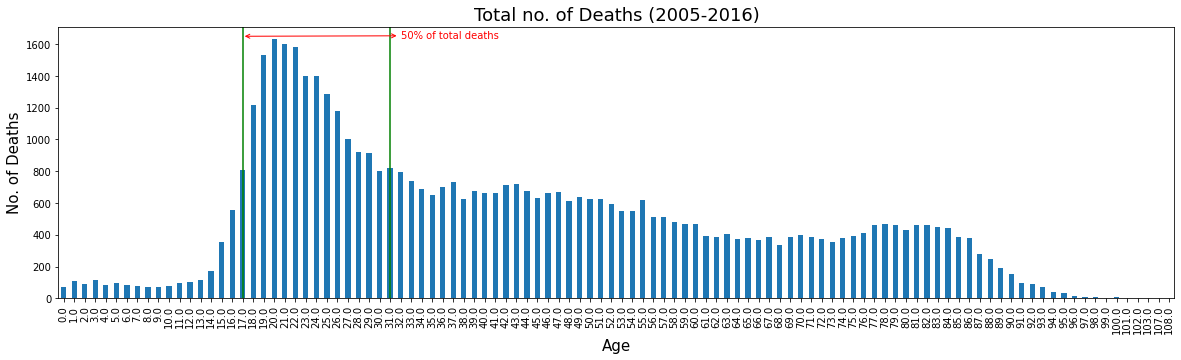

In [81]:
#ploting the no of deaths by age
pd.DataFrame(deaths)
plot=deaths.sort_index()
plot.plot.bar(figsize=(20,5))
plt.xlabel('Age',size=15)
plt.ylabel('No. of Deaths',size=15)
plt.title('Total no. of Deaths (2005-2016)',size=18)
plt.annotate('50% of total deaths',color='r',
            xy=(17,1650),
            xytext=(32,1635),
            arrowprops=dict(arrowstyle='<->',color='r'))
plt.axvline(x=17,color='g',linestyle='-')
plt.axvline(x=31,color='g',linestyle='-')

age above 84 is more likely to die (1 out of 10)


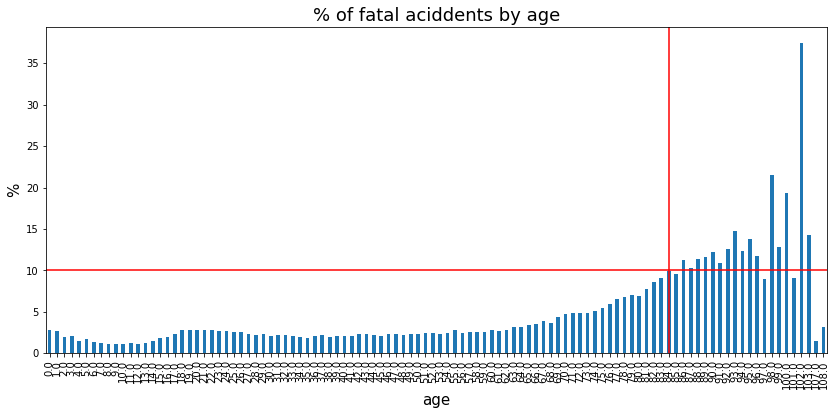

In [90]:
#fatal accident by age
death = df1['age'].value_counts().sort_index()
total = users['age'].value_counts().sort_index()
deaths_per=(deaths/total)*100
t=deaths_per.dropna()
minimum=t[t>9.9].index.min()
t.plot.bar(figsize=(14,6))
plt.title('% of fatal aciddents by age',size=18)
plt.xlabel('age',size=15)
plt.ylabel('%',size=15)
plt.axhline(y=10,color='r')
plt.axvline(x=84,color='r')
print('age above %2d is more likely to die (1 out of 10)'% int(minimum))

In [91]:
users['ct_age']=users['age'].apply(lambda x:1 if 17<=x<=31 else 0)
users['d_age']=users['age'].apply(lambda x:1 if x>84 else 0)

In [92]:
users.head()

,ID,catu,grav,secu,year_birth,ped,age,ct_age,d_age
0,201600000001,1,1,11.0,1983.0,0,33.0,0,0
1,201600000001,1,3,21.0,2001.0,0,15.0,0,0
2,201600000002,1,3,11.0,1960.0,0,56.0,0,0
3,201600000002,2,3,11.0,2000.0,0,16.0,0,0
4,201600000002,2,3,11.0,1962.0,0,54.0,0,0


In [95]:
df2=users.groupby('ID').sum().sort_index(ascending=True)
df2['ct_age1'] = df2['ct_age'].apply(lambda x: 1 if x>0 else 0)
df2['d_age1'] = df2['d_age'].apply(lambda x: 1 if x>0 else 0)
df2['ped1'] = df2['ped'].apply(lambda x: 1 if x>0 else 0)
df2['num_us'] = num_users
df2

,catu,grav,secu,year_birth,ped,age,ct_age,d_age,ct_age1,d_age1,ped1,num_us
ID,,,,,,,,,,,,
200500000001,10,11,86.0,11901.0,0,129.0,1,0,1,0,0,6
200500000002,2,4,32.0,3934.0,0,76.0,1,0,1,0,0,2
200500000003,2,4,42.0,3939.0,0,71.0,1,0,1,0,0,2
200500000004,5,14,44.0,7779.0,0,241.0,0,1,0,1,0,4
200500000005,3,7,22.0,3939.0,0,71.0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
201600059428,4,5,21.0,3994.0,1,38.0,1,0,1,0,1,2
201600059429,1,4,21.0,1984.0,0,32.0,0,0,0,0,0,1
201600059430,2,5,32.0,3972.0,0,60.0,1,0,1,0,0,2


Last feature is the severity from the *gravity* feature of the **users** dataset. Currently it consists of 4 labels:
1. Unscathed
2. Dead
3. Hospitalized Wonded
4. Light Injury

Here, idea is to simplify it to two labels and sort them by gravity, giving 0 to all cases of *unscathed* or *light injury* and 1 to all cases of *dead* or *hospitalized* users. \
Then the severity of each accident will be equal to the maximum gravity of any of the users.

In [97]:
def change_grav(x):
    if x==1 or x==4:
        return 0
    else:
        return 1
df3 = users[['ID', 'grav']].copy()
df3['grav'] = users['grav'].apply(change_grav)
df3.sort_values(by='ID')

,ID,grav
1678507,200500000001,0
1678512,200500000001,0
1678511,200500000001,0
1678508,200500000001,1
1678509,200500000001,0
...,...,...
133417,201600059431,0
133418,201600059431,0
133421,201600059432,0
133420,201600059432,0


In [100]:
severity = df3[['grav', 'ID']].groupby('ID').max().sort_index(ascending=True)
severity

,grav
ID,
200500000001,1
200500000002,1
200500000003,1
200500000004,1
200500000005,1
...,...
201600059428,0
201600059429,0
201600059430,0


In [101]:
df2['sev'] = severity
df2.reset_index(inplace=True)
df2

,ID,catu,grav,secu,year_birth,ped,age,ct_age,d_age,ct_age1,d_age1,ped1,num_us,sev
0,200500000001,10,11,86.0,11901.0,0,129.0,1,0,1,0,0,6,1
1,200500000002,2,4,32.0,3934.0,0,76.0,1,0,1,0,0,2,1
2,200500000003,2,4,42.0,3939.0,0,71.0,1,0,1,0,0,2,1
3,200500000004,5,14,44.0,7779.0,0,241.0,0,1,0,1,0,4,1
4,200500000005,3,7,22.0,3939.0,0,71.0,0,0,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839980,201600059428,4,5,21.0,3994.0,1,38.0,1,0,1,0,1,2,0
839981,201600059429,1,4,21.0,1984.0,0,32.0,0,0,0,0,0,1,0
839982,201600059430,2,5,32.0,3972.0,0,60.0,1,0,1,0,0,2,0
839983,201600059431,2,8,42.0,3984.0,0,48.0,2,0,1,0,0,2,0


In [103]:
df = df.merge(df2[['ID','ct_age1', 'ped1','d_age1', 'num_us', 'sev']], on='ID', how='left')
df

,ID,year,month,day,time,lum,agg,int,atm,col,...,shape,surf,infra,situation,school,ct_age1,ped1,d_age1,num_us,sev
0,201600000001,16,2,1,1445,1,2,1,8.0,3.0,...,3.0,1.0,0.0,1.0,0.0,0,0,0,2,1
1,201600000002,16,3,16,1800,1,2,6,1.0,6.0,...,2.0,1.0,0.0,1.0,0.0,0,0,0,3,1
2,201600000003,16,7,13,1900,1,1,1,1.0,6.0,...,3.0,2.0,0.0,3.0,99.0,1,1,0,2,1
3,201600000004,16,8,15,1930,2,2,1,7.0,3.0,...,1.0,1.0,0.0,1.0,99.0,1,0,0,3,1
4,201600000005,16,12,23,1100,1,2,3,1.0,3.0,...,1.0,1.0,0.0,1.0,3.0,0,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839980,200500087950,5,12,21,2035,5,2,2,1.0,3.0,...,1.0,1.0,0.0,1.0,3.0,1,0,0,2,0
839981,200500087951,5,12,23,1010,1,2,1,1.0,3.0,...,2.0,1.0,0.0,1.0,0.0,0,0,0,3,0
839982,200500087952,5,12,26,1715,1,2,2,1.0,3.0,...,1.0,1.0,0.0,1.0,3.0,1,0,0,3,0
839983,200500087953,5,12,27,1500,1,2,3,2.0,5.0,...,1.0,1.0,0.0,1.0,0.0,0,0,0,3,0


differenciating wheter the accident occured during holidays or weekends

### adding date and time

In [107]:
from datetime import datetime 

dt = df[['ID','year', 'month', 'day', 'time' ]]
#weekday
date = (dt.year+2000)*10000+dt.month*100+dt.day
dt['date'] = pd.to_datetime(date, format='%Y%m%d')
dt['weekday'] = dt['date'].dt.weekday 
#weekend
dt['weekend'] = dt['weekday'].apply(lambda x: 1 if x>4 else 0)

#holiday
dt.loc[dt.date.isin(holidays.ds) , 'holiday'] = 1
dt.holiday.fillna(0, inplace=True)
dt.head(5)

,ID,year,month,day,time,date,weekday,weekend,holiday
0,201600000001,16,2,1,1445,2016-02-01,0,0,0.0
1,201600000002,16,3,16,1800,2016-03-16,2,0,0.0
2,201600000003,16,7,13,1900,2016-07-13,2,0,0.0
3,201600000004,16,8,15,1930,2016-08-15,0,0,1.0
4,201600000005,16,12,23,1100,2016-12-23,4,0,0.0


In [108]:
df = df.merge(dt[['ID', 'date', 'weekend', 'holiday']],on='ID', how='left')
df.drop(['year', 'month', 'day'], axis=1, inplace=True)
df.head()

,ID,time,lum,agg,int,atm,col,lat,long,dep,...,situation,school,ct_age1,ped1,d_age1,num_us,sev,date,weekend,holiday
0,201600000001,1445,1,2,1,8.0,3.0,0.0,0,590,...,1.0,0.0,0,0,0,2,1,2016-02-01,0,0.0
1,201600000002,1800,1,2,6,1.0,6.0,0.0,0,590,...,1.0,0.0,0,0,0,3,1,2016-03-16,0,0.0
2,201600000003,1900,1,1,1,1.0,6.0,0.0,0,590,...,3.0,99.0,1,1,0,2,1,2016-07-13,0,0.0
3,201600000004,1930,2,2,1,7.0,3.0,0.0,0,590,...,1.0,99.0,1,0,0,3,1,2016-08-15,0,1.0
4,201600000005,1100,1,2,3,1.0,3.0,0.0,0,590,...,1.0,3.0,0,0,0,3,1,2016-12-23,0,0.0


In [109]:
df['time'] = df.time.div(100).apply(np.floor)

In [110]:
df.rename(columns={'ct_age1':'crit_age','d_age1':'dead_age', 'ped1':'ped'},inplace=True)
df.to_csv('data.csv')